In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import sklearn.exceptions
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
train=pd.read_csv("fraudTrain.csv")
test=pd.read_csv("fraudTest.csv")

In [3]:

import matplotlib.pyplot as plt
from sklearn import *

warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
df_train= train.sample(frac = 0.1,random_state=1)
df_test= test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(129668, 23) (27786, 23)


In [7]:
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res

In [8]:
df_train = dropCol(df_train)
# test data set
df_test = dropCol(df_test)

print ( df_train.shape, df_test.shape)

(129668, 17) (27786, 17)


In [9]:
df_train.tail(100)

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
475633,fraud_Goodwin-Nitzsche,grocery_pos,88.66,M,8088 Sherman Radial Suite 689,Helm,CA,93627,36.4992,-120.0936,123,Early years teacher,1973-02-07,1343458823,35.801259,-119.096589,0
1004973,"fraud_Schoen, Nienow and Bauch",personal_care,14.65,M,4440 George Mills Suite 591,Dallas,TX,75210,32.7699,-96.7430,1263321,Television camera operator,1942-11-24,1361051870,33.340349,-96.769406,0
1022980,fraud_Monahan-Morar,personal_care,12.76,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,1361988337,43.265115,-70.940484,0
1034220,fraud_Hermann-Gaylord,misc_pos,36.86,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,1362389281,39.830320,-77.735115,0
239781,"fraud_Jones, Sawayn and Romaguera",misc_net,8.91,F,302 Christina Islands,Smiths Grove,KY,42171,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,1335741793,37.610153,-86.018512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944454,fraud_Reichert-Weissnat,travel,5.83,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,1972-10-04,1358007774,40.522369,-79.314668,0
23683,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,1.96,F,27479 Reeves Dale,Whaleyville,MD,21872,38.4121,-75.2811,718,Regulatory affairs officer,1985-03-19,1326572609,38.534192,-76.161654,0
296375,fraud_Lubowitz-Walter,kids_pets,26.59,F,72966 Shannon Pass Apt. 391,Bauxite,AR,72011,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,1337963080,35.175647,-91.740062,0
306312,"fraud_Runolfsdottir, Mueller and Hand",entertainment,6.00,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.0080,238602,"Scientist, research (maths)",1993-05-14,1338216727,34.360264,-78.128199,0


In [10]:
df_train.isnull().sum()

merchant      0
category      0
amt           0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [11]:
df_test.isnull().sum()

merchant      0
category      0
amt           0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

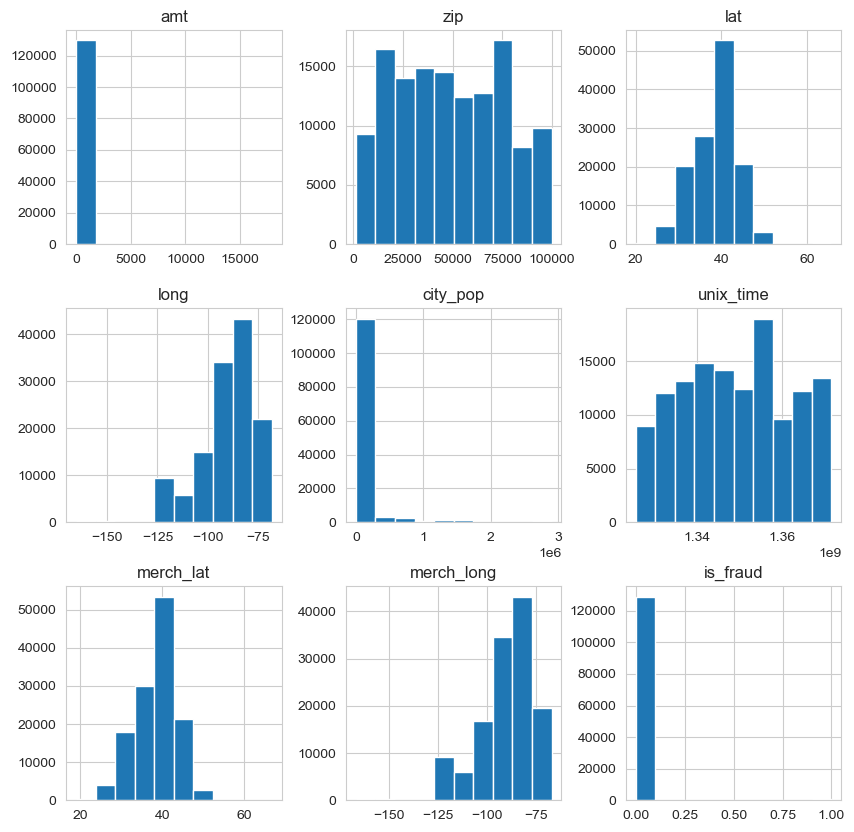

In [12]:
df_train.hist(figsize = (10, 10))
plt.show()

In [13]:
fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

print("Normal cases in train set :",len(df_train)-len(fraud_train),"\nFraud cases in train set :",len(fraud_train))
print("Normal cases in test set :",len(df_test)-len(fraud_test),"\nFraud cases in test set :",len(fraud_test))

Normal cases in train set : 128963 
Fraud cases in train set : 705
Normal cases in test set : 27656 
Fraud cases in test set : 130


In [14]:
#Create independent and Dependent Features
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (27786, 16) (27786,)


In [15]:
X_train.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1330158280,46.398331,-99.813959
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,1334260215,45.687331,-117.488135
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,1370037053,27.254081,-81.974799
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1997-12-27,1348160812,34.551957,-83.374265
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,1346455370,43.032957,-83.521294


In [16]:
# concanating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape

(157454, 16)

In [17]:
final_df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1330158280,46.398331,-99.813959
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,1334260215,45.687331,-117.488135
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,1370037053,27.254081,-81.974799
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1997-12-27,1348160812,34.551957,-83.374265
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,1346455370,43.032957,-83.521294


In [18]:
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'dob']

In [19]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 957
Distinct categories for city  are 872
Distinct categories for state  are 51
Distinct categories for job  are 486
Distinct categories for dob  are 942


In [20]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [21]:
final_df = category_onehot_multcols(final_df, categorical_features)

merchant
category
gender
street
city
state
job
dob


In [22]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(157454, 4017)

In [23]:
# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]
print(df_Train.shape,df_Test.shape)

(129668, 4017) (27786, 4017)


In [24]:
print(Y_train.value_counts(),"\n",Y_test.value_counts())

is_fraud
0    128963
1       705
Name: count, dtype: int64 
 is_fraud
0    27656
1      130
Name: count, dtype: int64


In [25]:
# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)

(129668, 4017) (27786, 4017) (129668,) (27786,)


In [26]:
# adding the dependent feature in the train data set
print(Y_train.shape,df_Train.shape)
df_train = pd.concat([df_Train,Y_train],axis = 1)
df_train.shape

(129668,) (129668, 4017)


(129668, 4018)

In [27]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705


(128963, 4018) (705, 4018)


In [28]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())

Random under-sampling:
is_fraud
0    705
1    705
Name: count, dtype: int64


In [29]:
def print_eval(y_pred,model):
    print("Training Accuracy: ",model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = sklearn.metrics.confusion_matrix(Y_test, y_pred)
    print(cm)
    categories = ['Positive','Negative']
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Training Accuracy:  0.8615001388160533
Testing Accuracy:  0.8644641186208882
[[24008  3648]
 [  118    12]]


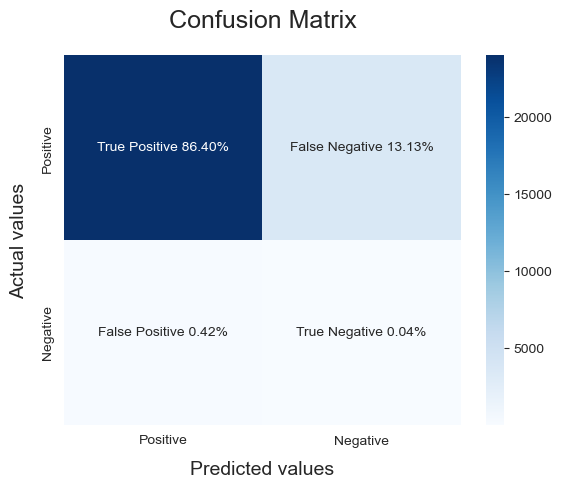

In [30]:
# training and predictions : Logistic Regression Under Sampling 
X = df_train_under_sample.drop('is_fraud',axis='columns')
y = df_train_under_sample['is_fraud']
model_LR_under_sample = sklearn.linear_model.LogisticRegression(random_state=137)
model_LR_under_sample.fit(X,y)
y_pred = model_LR_under_sample.predict(df_Test)
print_eval(y_pred,model_LR_under_sample)

Training Accuracy:  0.9346176388931733
Testing Accuracy:  0.9397178435183186
[[25984  1672]
 [    3   127]]


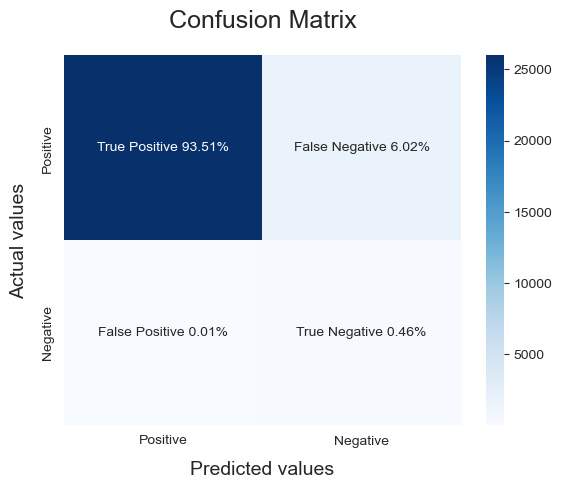

In [31]:
# training and predictions : decision tree Regression Under Sampling
decision_tree_model_undersample = sklearn.tree.DecisionTreeClassifier(random_state=137)
decision_tree_model_undersample.fit(X,y)
y_pred = decision_tree_model_undersample.predict(df_Test)
print_eval(y_pred,decision_tree_model_undersample)